##Imports

In [286]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from pprint import pprint
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder

##Install Dataset

In [287]:
pip install ucimlrepo

In [288]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

# metadata
print(abalone.metadata)

# variable information
print(abalone.variables)


{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

##X - EDA - Graphs

In [289]:
X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


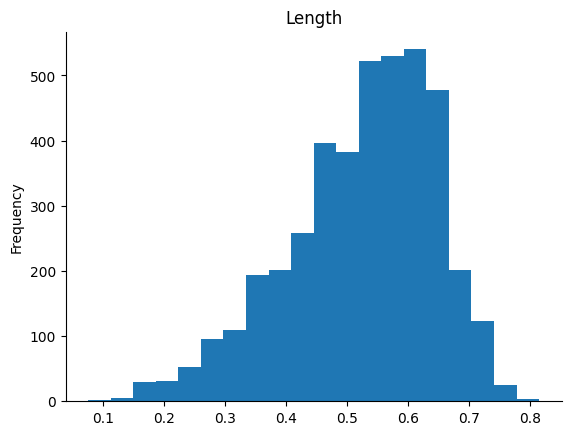

In [290]:
# @title Length

from matplotlib import pyplot as plt
X['Length'].plot(kind='hist', bins=20, title='Length')
plt.gca().spines[['top', 'right',]].set_visible(False)

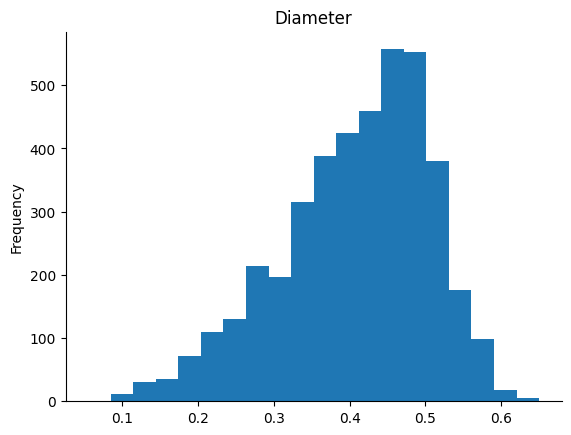

In [291]:
# @title Diameter

from matplotlib import pyplot as plt
X['Diameter'].plot(kind='hist', bins=20, title='Diameter')
plt.gca().spines[['top', 'right',]].set_visible(False)

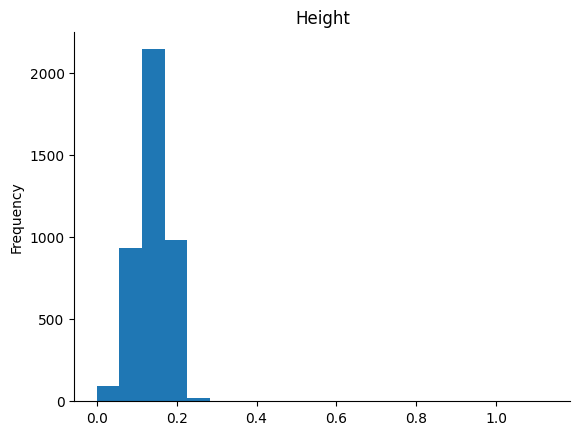

In [292]:
# @title Height

from matplotlib import pyplot as plt
X['Height'].plot(kind='hist', bins=20, title='Height')
plt.gca().spines[['top', 'right',]].set_visible(False)

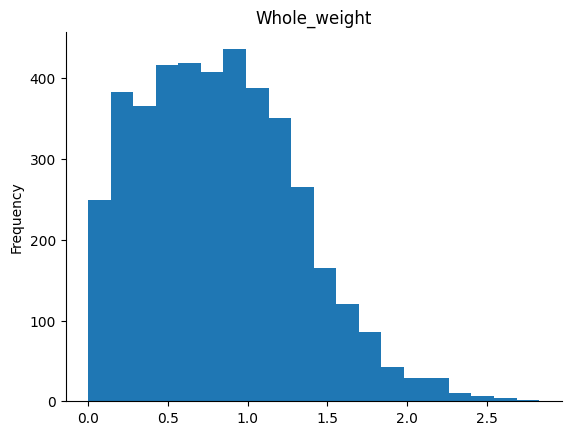

In [293]:
# @title Whole_weight

from matplotlib import pyplot as plt
X['Whole_weight'].plot(kind='hist', bins=20, title='Whole_weight')
plt.gca().spines[['top', 'right',]].set_visible(False)

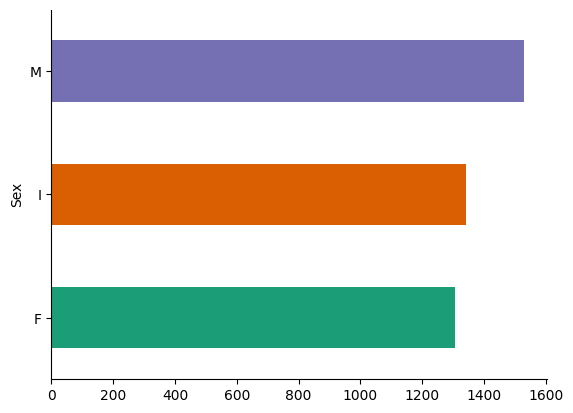

In [294]:
# @title Sex

from matplotlib import pyplot as plt
import seaborn as sns
X.groupby('Sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-295-7d81624abca8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(X, x='Height', y='Sex', inner='box', palette='Dark2')


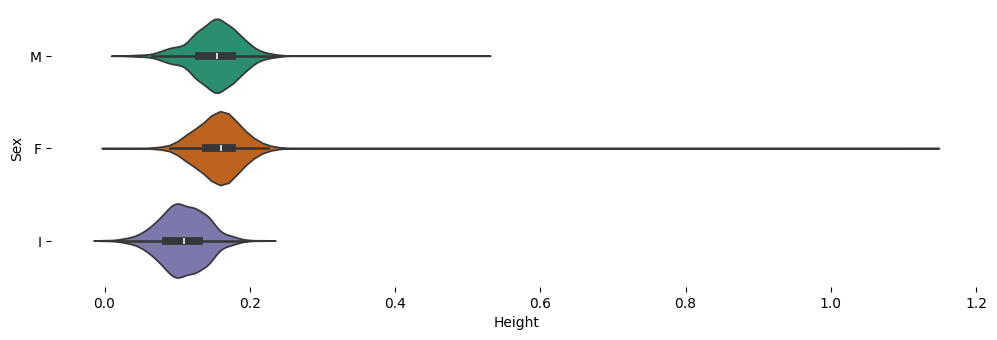

In [295]:
# @title Sex vs Height

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(X['Sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(X, x='Height', y='Sex', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-296-9bc23b34b992>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(X, x='Diameter', y='Sex', inner='box', palette='Dark2')


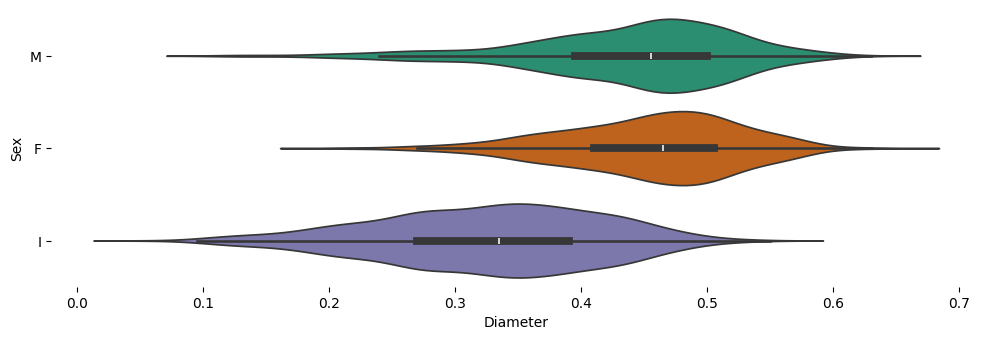

In [296]:
# @title Sex vs Diameter

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(X['Sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(X, x='Diameter', y='Sex', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-297-954774488379>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(X, x='Length', y='Sex', inner='box', palette='Dark2')


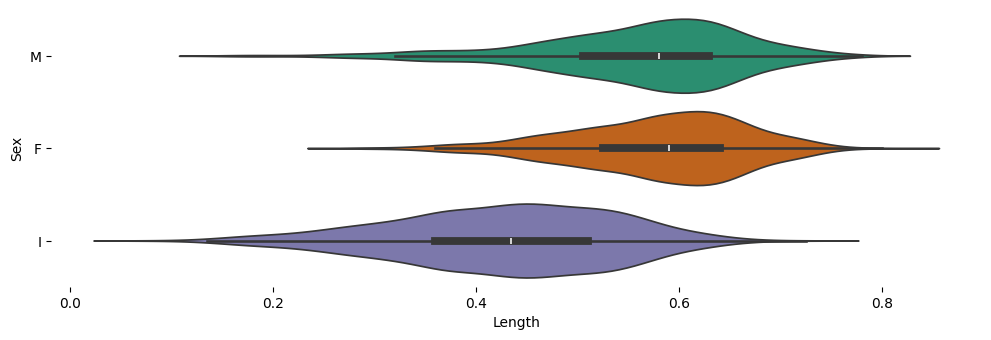

In [297]:
# @title Sex vs Length

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(X['Sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(X, x='Length', y='Sex', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-298-c718f362d9f5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(X, x='Whole_weight', y='Sex', inner='box', palette='Dark2')


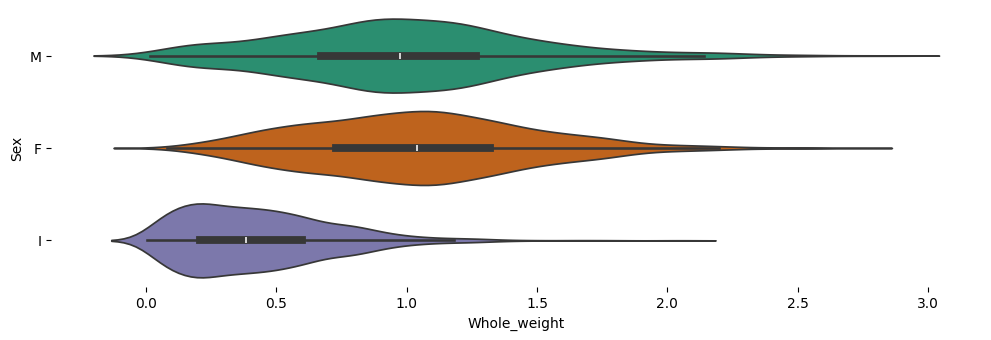

In [298]:
# @title Sex vs Whole_weight

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(X['Sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(X, x='Whole_weight', y='Sex', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

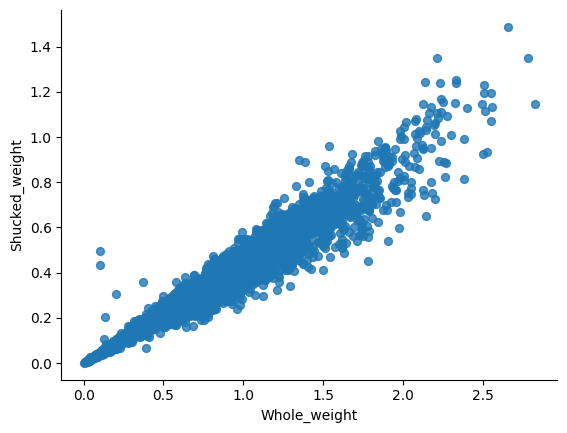

In [299]:
# @title Whole_weight vs Shucked_weight

from matplotlib import pyplot as plt
X.plot(kind='scatter', x='Whole_weight', y='Shucked_weight', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

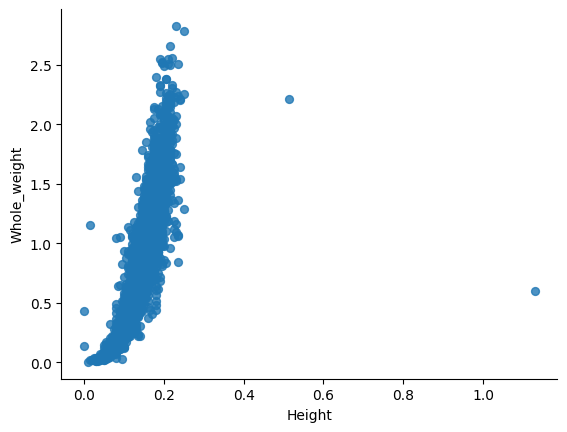

In [300]:
# @title Height vs Whole_weight

from matplotlib import pyplot as plt
X.plot(kind='scatter', x='Height', y='Whole_weight', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

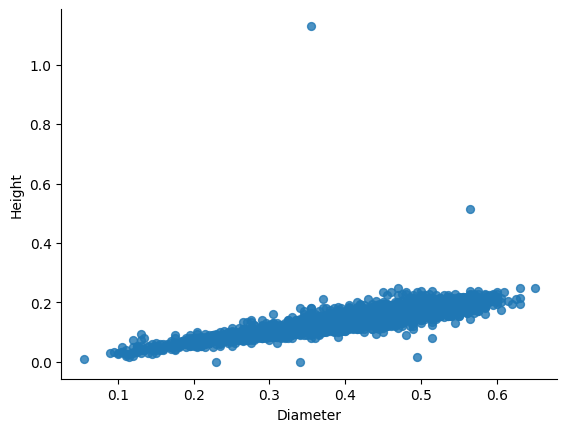

In [301]:
# @title Diameter vs Height

from matplotlib import pyplot as plt
X.plot(kind='scatter', x='Diameter', y='Height', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

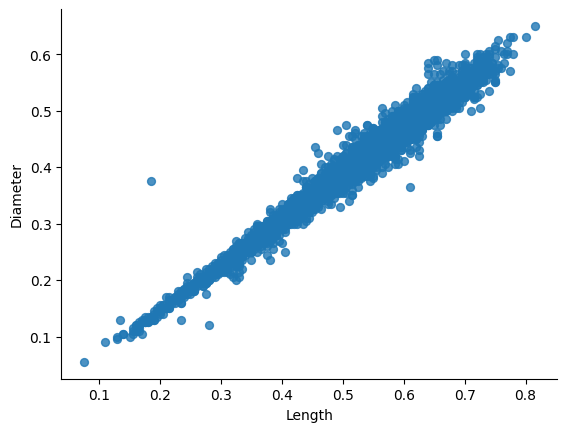

In [302]:
# @title Length vs Diameter

from matplotlib import pyplot as plt
X.plot(kind='scatter', x='Length', y='Diameter', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

##Y - EDA - Graphs

In [303]:
y.head()

,Rings
0,15
1,7
2,9
3,10
4,7


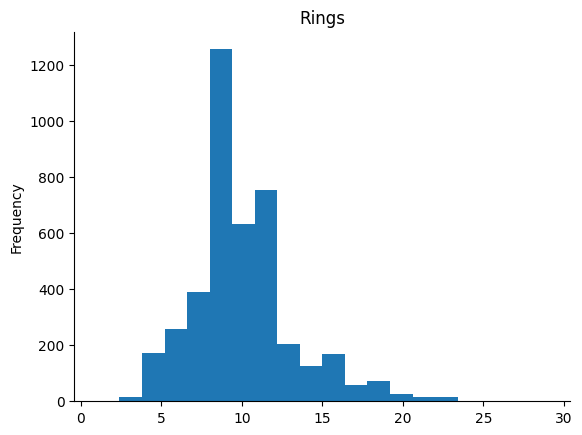

In [304]:
# @title Rings

from matplotlib import pyplot as plt
y['Rings'].plot(kind='hist', bins=20, title='Rings')
plt.gca().spines[['top', 'right',]].set_visible(False)

##X - EDA

In [305]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
dtypes: float64(7), object(1)
memory usage: 261.2+ KB


In [306]:
X.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


In [307]:
X = X.fillna(value=np.nan)
missing_values = X.isna().sum()
print(missing_values)

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
dtype: int64


In [308]:
X.nunique()

Sex                  3
Length             134
Diameter           111
Height              51
Whole_weight      2429
Shucked_weight    1515
Viscera_weight     880
Shell_weight       926
dtype: int64

In [309]:
encoder = OneHotEncoder(sparse_output=False)
encoded_sex = encoder.fit_transform(X[['Sex']])

encoded_sex_df = pd.DataFrame(encoded_sex, columns=encoder.get_feature_names_out(['Sex']))

X = X.drop('Sex', axis=1)

X = pd.concat([X, encoded_sex_df], axis=1)


In [310]:
X.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0.0,0.0,1.0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0.0,0.0,1.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1.0,0.0,0.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0.0,0.0,1.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0.0,1.0,0.0


In [311]:
index_of_shell_weight = X.columns.get_loc('Shell_weight')
print(index_of_shell_weight)

6


In [312]:
X[X["Shell_weight"].isnull()]

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M


In [313]:
X["Shell_weight"].fillna(X["Shell_weight"].mean(), inplace=True)

##Y - EDA

In [314]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Rings   4177 non-null   int64
dtypes: int64(1)
memory usage: 32.8 KB


In [315]:
y.describe()

,Rings
count,4177.000000
mean,9.933684
std,3.224169
min,1.000000
25%,8.000000
50%,9.000000
75%,11.000000
max,29.000000


In [316]:
y = y.fillna(value=np.nan)
missing_values = y.isna().sum()
print(missing_values)

Rings    0
dtype: int64


In [317]:
y.nunique()

Rings    28
dtype: int64

##Decision Tree

In [318]:
def classify_example(example, tree):
    question = list(tree.keys())[0]
    feature_name, comparison_operator, value = question.split()

    # condition check
    if example[feature_name] <= float(value):
        answer = tree[question][0]
    else:
        answer = tree[question][1]

    if not isinstance(answer, dict):
        return answer

    # iter branches
    else:
        residual_tree = answer
        return classify_example(example, residual_tree)

In [319]:
def calculate_accuracy(df, tree):

    df["classification"] = df.apply(classify_example, axis=1, args=(tree,))
    df["classification_correct"] = df["classification"] == y["Rings"]

    accuracy = df["classification_correct"].mean()

    return accuracy

In [320]:
def check_purity(data):

    label_column = data[:, -1]
    unique_classes = np.unique(label_column)

    if len(unique_classes) == 1:
        return True
    else:
        return False

In [321]:
def classify_data(data):

    label_column = data[:, -1]
    unique_classes, counts_unique_classes = np.unique(label_column, return_counts=True)

    index = counts_unique_classes.argmax()
    classification = unique_classes[index]

    return classification

In [322]:
def get_potential_splits(data):
    potential_splits = {}
    _, n_columns = data.shape
    for column_index in range(n_columns - 1):
        potential_splits[column_index] = []
        values = data[:, column_index]

        if np.issubdtype(values.dtype, np.number):
            unique_values = np.unique(values)
            for index in range(len(unique_values)):
                if index != 0:
                    current_value = unique_values[index]
                    previous_value = unique_values[index - 1]
                    potential_split = (current_value + previous_value) / 2
                    potential_splits[column_index].append(potential_split)

    return potential_splits

In [323]:
def split_data(data, split_column, split_value):
    if isinstance(data, pd.DataFrame):
        data_array = data.values
    else:
        data_array = data

    split_column_values = data_array[:, split_column]

    if split_value is None:
        return data_array, None

    data_below = data_array[np.where(split_column_values <= split_value)]
    data_above = data_array[np.where(split_column_values > split_value)]

    return data_below, data_above


In [324]:
def calculate_entropy(data):
    label_column = data[:, -1]
    _, counts = np.unique(label_column, return_counts=True)

    probabilities = counts / counts.sum()
    entropy = sum(probabilities * -np.log2(probabilities))

    return entropy

In [325]:
def calculate_overall_entropy(data_below, data_above, metric_function):
    n = len(data_below) + len(data_above)
    p_data_below = len(data_below) / n
    p_data_above = len(data_above) / n

    overall_entropy =  (p_data_below * metric_function(data_below)
                      + p_data_above * metric_function(data_above))

    return overall_entropy

In [326]:
def determine_best_split(data, potential_splits):
    best_overall_entropy = float('inf')
    best_split_column = None
    best_split_value = None

    for column_index in potential_splits:
        for value in potential_splits[column_index]:
            data_below, data_above = split_data(data, split_column=column_index, split_value=value)

            current_overall_entropy = calculate_overall_entropy(data_below, data_above, metric_function=calculate_entropy)

            if current_overall_entropy <= best_overall_entropy:
                best_overall_entropy = current_overall_entropy
                best_split_column = column_index
                best_split_value = value

    return best_split_column, best_split_value



In [327]:
def decision_tree_algorithm(df, counter=0, min_samples=10, max_depth=15):
    if counter == 0:
        global COLUMN_HEADERS
        COLUMN_HEADERS = df.columns
        data = df.values
    else:
        data = df

    if (check_purity(data)) or (len(data) < min_samples) or (counter == max_depth):
        classification = classify_data(data)

        return classification

    else:
        counter += 1

        potential_splits = get_potential_splits(data)
        split_column, split_value = determine_best_split(data, potential_splits)
        data_below, data_above = split_data(data, split_column, split_value)

        feature_name = COLUMN_HEADERS[split_column]
        question = "{} <= {}".format(feature_name, split_value)
        sub_tree = {question: []}

        yes_answer = decision_tree_algorithm(data_below, counter, min_samples, max_depth)
        no_answer = decision_tree_algorithm(data_above, counter, min_samples, max_depth)

        if yes_answer == no_answer:
            sub_tree = yes_answer
        else:
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)

        return sub_tree

##Build Part - dt

In [328]:
def build_dt(X, y, attribute_types, options):
  df = pd.concat([X, y], axis=1)

  df = df.dropna()

  tree = decision_tree_algorithm(df, max_depth=options['max_depth'], min_samples=options['min_samples'])
  return tree

##Predict Part - dt

In [329]:
def predict_dt(dt, X, options):
  accuracy = calculate_accuracy(X, dt)
  return accuracy

##Decision Tree Method Calling

In [330]:
options = {
    'max_depth': 15,
    'min_samples': 10,
}
attribute_types = {}

In [331]:
y_series = y["Rings"]
tree = build_dt(X, y_series, attribute_types, options)

In [332]:
accuracy = predict_dt(tree, X, options)

In [333]:
print(f"Accuracy: {accuracy}")


Accuracy: 0.6061766818290639


In [334]:
pprint(tree)

{'Shell_weight <= 0.1445': [{'Diameter <= 0.2225': [{'Shell_weight <= 0.02175': [{'Whole_weight <= 0.02325': [{'Shucked_weight <= 0.00475': [3.0,
                                                                                                                                             {'Whole_weight <= 0.02025': [{'Sex_M <= 0.5': [4.0,
                                                                                                                                                                                            3.0]},
                                                                                                                                                                          3.0]}]},
                                                                                                              {'Viscera_weight <= 0.0115': [{'Shucked_weight <= 0.01175': [{'Shucked_weight <= 0.00925': [5.0,
                                                                                

##K-Fold

In [336]:
from sklearn.model_selection import KFold

k = 5

kf = KFold(n_splits=k, shuffle=True, random_state=42)

accuracies = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    y_train_series = y_train[y_train.columns[0]].squeeze()

    y_test_series = y_train["Rings"]

    tree = build_dt(X_train, y_train_series, attribute_types, options)

    y_pred = predict_dt(tree, X_test, options)

    accuracies.append(y_pred)

mean_accuracy = sum(accuracies) / len(accuracies)

print(f"Mean Accuracy: {mean_accuracy}")


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

##Random Decision Forest

In [337]:
def create_leaf(data):

    label_column = data[:, -1]
    leaf = np.mean(label_column)

    return leaf

In [338]:
def calculate_mse(data):
    actual_values = data[:, -1]
    if len(actual_values) == 0:   # empty data
        mse = 0

    else:
        prediction = np.mean(actual_values)
        mse = np.mean((actual_values - prediction) **2)

    return mse

In [339]:
def determine_type_of_feature(df):

    feature_types = []
    n_unique_values_treshold = 15
    for feature in df.columns:
        if feature != "label":
            unique_values = df[feature].unique()
            example_value = unique_values[0]

            if (isinstance(example_value, str)) or (len(unique_values) <= n_unique_values_treshold):
                feature_types.append("categorical")
            else:
                feature_types.append("continuous")

    return feature_types

In [340]:
def reg_decision_tree_algorithm(df, counter=0, min_samples=2, max_depth=5):

    if counter == 0:
        global COLUMN_HEADERS, FEATURE_TYPES
        COLUMN_HEADERS = df.columns
        FEATURE_TYPES = determine_type_of_feature(df)
        data = df.values
        return data
    else:
        data = df

    if (len(data) < min_samples) or (counter == max_depth):
        leaf = create_leaf(data)
        return leaf

    else:
        counter += 1

        potential_splits = get_potential_splits(data)
        split_column, split_value = determine_best_split(data, potential_splits)
        data_below, data_above = split_data(data, split_column, split_value)

        feature_name = np.array(COLUMN_HEADERS)[split_column]

        if split_column is not None:
            type_of_feature = FEATURE_TYPES[split_column]
            if type_of_feature == "continuous":
                question = "{} <= {}".format(feature_name, split_value)
            else:
                question = "{} = {}".format(feature_name, split_value)
        else:
            question = "{} = {}".format(feature_name, split_value)
            type_of_feature = None
            question = "Unknown"


        sub_tree = {question: []}

        yes_answer = reg_decision_tree_algorithm(data_below, counter, min_samples, max_depth)
        no_answer = reg_decision_tree_algorithm(data_above, counter, min_samples, max_depth)

        if yes_answer == no_answer:
            sub_tree = yes_answer
        else:
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)

        return sub_tree

In [341]:
def random_forest_algorithm(train_df, n_trees, n_bootstrap, n_features, dt_max_depth):
    forest = []
    for i in range(n_trees):
        df_bootstrapped = train_df.sample(n=n_bootstrap, replace=True)
        tree = reg_decision_tree_algorithm(df_bootstrapped, max_depth=dt_max_depth)
        forest.append(tree)
    return forest

In [342]:
def calculate_accuracy_from_array(predictions, actual):
    correct_count = sum(p == a for p, a in zip(predictions, actual))
    total_count = len(actual)
    accuracy = correct_count / total_count
    return accuracy


##Build Part - rdf

In [343]:
def build_rdf(X, y, attribute_types, N = 1, options = {"max_depth": 13, "min_samples": 2, "max_features": None}):
  tree = reg_decision_tree_algorithm(X, max_depth=options["max_depth"], min_samples=options["min_samples"])
  return tree

##Predict Part - rdf

In [344]:
def predict_rdf(rdf, X, options):
  accuracy = calculate_accuracy_from_array(rdf, X)
  return accuracy

##Random Forest Method Calling

In [345]:
options = {
    "max_depth": 90,
    "min_samples": 2,
    "max_features": None,
}

In [346]:
tree = build_rdf(X, y["Rings"], None, 1, options=options)

In [347]:
accuracy = predict_rdf(tree, X, options)
print(f"Accuracy: {accuracy}")


Accuracy: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [348]:
pprint(tree)

array([[0.455, 0.365, 0.095, ..., 1.0, 15.0, True],
       [0.35, 0.265, 0.09, ..., 1.0, 6.0, False],
       [0.53, 0.42, 0.135, ..., 0.0, 8.0, False],
       ...,
       [0.6, 0.475, 0.205, ..., 1.0, 10.0, False],
       [0.625, 0.485, 0.15, ..., 0.0, 10.0, True],
       [0.71, 0.555, 0.195, ..., 1.0, 12.0, True]], dtype=object)
